# Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
from scipy.sparse import csr_matrix

In [4]:
warnings.filterwarnings("ignore")

# Dataset

In [ ]:
# Original Dataset load (266MB) - 6 months long Glovo orders in BCN from Jul 1st to Dec 31st 2021

In [5]:
df = pd.read_csv ('data/orders 2022-03-05T1431.csv')

In [24]:
df.shape

(2460001, 15)

In [25]:
df.head(100)

,Unnamed: 0,Code,Store Name,Store ID,Termination Local Date,Termination Local Time,Total Purchase,ID,Registration Age Range,Made More Than One Order (Yes / No),Last Order Date,Staff (Yes / No),Top Fifty (Yes / No),Rating Store Service,Positive Store Service (Yes / No)
0,1,B3JKGPPT,Five Guys,223524.0,2021-12-30,2021-12-30 12:59:24,11.5,861650.0,NaN,Yes,2021-12-30,No,No,Missing,No
1,2,BBRACYGD,Parking Pizza,1419.0,2021-12-30,2021-12-30 13:25:22,14.0,444732.0,NaN,Yes,2022-03-04,No,Yes,Positive,Yes
2,3,BSMP18DY,Crep Nova,97780.0,2021-12-30,2021-12-30 21:14:14,25.6,619969.0,25.0,Yes,2022-03-02,No,Yes,Positive,Yes
3,4,B3EQU1C8,McDonald's®,9487.0,2021-12-30,2021-12-30 22:42:29,16.2,1784091.0,50.0,Yes,2022-02-27,No,No,Missing,No
4,5,BRG4B1PG,TexMex & Co,2122.0,2021-12-30,2021-12-30 21:39:17,28.85,6715.0,NaN,Yes,2022-01-23,No,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,B1VLURKR,Metropolitan Gourmet Burgers,40961.0,2021-12-30,2021-12-30 14:04:42,71.0,9749772.0,NaN,Yes,2022-03-01,No,No,Missing,No
96,97,B8PLTJMW,McDonald's®,9487.0,2021-12-30,2021-12-30 21:01:11,10.5,58048.0,NaN,Yes,2022-03-04,No,No,Positive,Yes
97,98,BVWZGWJC,Envols-Poké Bowls,118386.0,2021-12-30,2021-12-30 13:34:50,13.65,100490.0,NaN,Yes,2022-03-04,No,No,Positive,Yes
98,99,BL1LL1U5,Bonrollo,3116.0,2021-12-30,2021-12-30 21:15:34,9.5,19691738.0,NaN,Yes,2022-02-28,No,No,Missing,No


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460001 entries, 0 to 2460000
Data columns (total 15 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           object 
 1   Code                                 object 
 2   Store Name                           object 
 3   Store ID                             float64
 4   Termination Local Date               object 
 5   Termination Local Time               object 
 6   Total Purchase                       object 
 7   ID                                   float64
 8   Registration Age Range               float64
 9   Made More Than One Order (Yes / No)  object 
 10  Last Order Date                      object 
 11  Staff (Yes / No)                     object 
 12  Top Fifty (Yes / No)                 object 
 13  Rating Store Service                 object 
 14  Positive Store Service (Yes / No)    object 
dtypes: float64(3), object(12)
memory

In [6]:
# Identificando NAs
df.isna().sum()

Unnamed: 0                                   0
Code                                         1
Store Name                                   1
Store ID                                     1
Termination Local Date                       1
Termination Local Time                       1
Total Purchase                               1
ID                                           1
Registration Age Range                 2004561
Made More Than One Order (Yes / No)          1
Last Order Date                             63
Staff (Yes / No)                             1
Top Fifty (Yes / No)                         1
Rating Store Service                         1
Positive Store Service (Yes / No)            1
dtype: int64

In [35]:
# Identifying row with NAs
df.drop('Registration Age Range',axis=1).isna()==True

,Unnamed: 0,Code,Store Name,Store ID,Termination Local Date,Termination Local Time,Total Purchase,ID,Made More Than One Order (Yes / No),Last Order Date,Staff (Yes / No),Top Fifty (Yes / No),Rating Store Service,Positive Store Service (Yes / No)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2459997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2459998,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2459999,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# Identified row 2460000 as all NAs
df.loc[2460000]

Unnamed: 0                             SQL Error: ERROR: Query (77073085) cancelled b...
Code                                                                                 NaN
Store Name                                                                           NaN
Store ID                                                                             NaN
Termination Local Date                                                               NaN
Termination Local Time                                                               NaN
Total Purchase                                                                       NaN
ID                                                                                   NaN
Registration Age Range                                                               NaN
Made More Than One Order (Yes / No)                                                  NaN
Last Order Date                                                                      NaN
Staff (Yes / No)     

In [7]:
# I'm droping this one row as it's only one over 2M
df.drop([2460000], axis=0, inplace=True)

In [8]:
# Counterproof of NAs
df.isna().sum()

Unnamed: 0                                   0
Code                                         0
Store Name                                   0
Store ID                                     0
Termination Local Date                       0
Termination Local Time                       0
Total Purchase                               0
ID                                           0
Registration Age Range                 2004560
Made More Than One Order (Yes / No)          0
Last Order Date                             62
Staff (Yes / No)                             0
Top Fifty (Yes / No)                         0
Rating Store Service                         0
Positive Store Service (Yes / No)            0
dtype: int64

In [38]:
#Checking information regarding Age Range
df['Registration Age Range'].value_counts()

30.0     141758
25.0     119350
35.0      87945
40.0      47185
45.0      23206
20.0      17861
50.0       9899
55.0       3748
60.0       1538
115.0       608
105.0       567
65.0        559
70.0        360
110.0       221
100.0       164
75.0        150
90.0        138
15.0         74
95.0         39
80.0         36
85.0         34
Name: Registration Age Range, dtype: int64

In [39]:
df['Positive Store Service (Yes / No)'].value_counts()

No     1484266
Yes     975734
Name: Positive Store Service (Yes / No), dtype: int64

In [ ]:
# Creation of a smaller dataset

In [40]:
df1 = df[['Code','Store Name','ID','Positive Store Service (Yes / No)']]

In [41]:
df1.to_csv('data\df_matrix.csv',index=False)

In [58]:
# TIRAR ESSA LINHA DEPOIS!!!!!!!!!!!!!
df1 = pd.read_csv ('data/df_matrix.csv')

In [10]:
df1.shape

(2460000, 4)

# Matrix Dataset

In [44]:
df1.head(10)

,Code,Store Name,ID,Positive Store Service (Yes / No)
0,B3JKGPPT,Five Guys,861650.0,No
1,BBRACYGD,Parking Pizza,444732.0,Yes
2,BSMP18DY,Crep Nova,619969.0,Yes
3,B3EQU1C8,McDonald's®,1784091.0,No
4,BRG4B1PG,TexMex & Co,6715.0,Yes
5,BCBA18DC,Kebab Nepolis Pizza,243807.0,No
6,BQM2M11H,Secrets By Farga,159806.0,Yes
7,B37MGPNM,VICIO,60988.0,No
8,BPE66S4D,McDonald's®,43750.0,No
9,BFVLQGAL,Yoüme Sushi,1423043.0,No


In [36]:
# Checking for NAs
df1.isna().sum()

Code                                 0
Store Name                           0
ID                                   0
Positive Store Service (Yes / No)    0
dtype: int64

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460000 entries, 0 to 2459999
Data columns (total 4 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Code                               object 
 1   Store Name                         object 
 2   ID                                 float64
 3   Positive Store Service (Yes / No)  object 
dtypes: float64(1), object(3)
memory usage: 93.8+ MB


Text(0.5, 1.0, 'Distribution of votes')

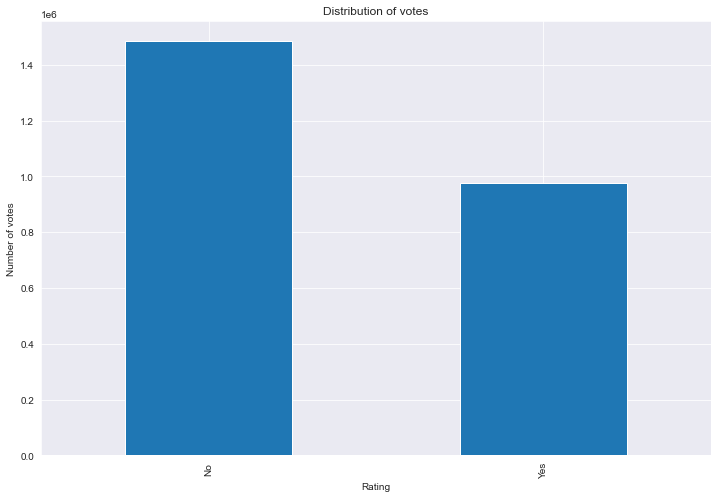

In [59]:
# Visualization of the distribution of votes to check how balanced the metric is
ratings_count = df1['Positive Store Service (Yes / No)'].value_counts()
plt.figure(figsize=(12,8))
ax = ratings_count.plot.bar()
ax.set_xlabel("Rating")
ax.set_ylabel("Number of votes");
ax.set_title("Distribution of votes")

In [62]:
# Renaming the column
df1.rename(columns = {'Positive Store Service (Yes / No)':'rating'}, inplace = True)

In [42]:
# Top 50 stores with more Orders
df1.groupby(['Store Name'])['ID'].count().sort_values(ascending=False).head(50)

Store Name
McDonald's®                346060
KFC                        130862
Glovo Express              128973
VICIO                       50244
Goiko                       48533
Yoüme Sushi                 48102
Five Guys                   43300
Gonzalez & Co               42983
Burger King                 42002
Honest Greens               41025
UDON                        36477
La Tagliatella              30121
TGB                         23861
Subway                      22410
Papa John's                 21694
Crep Nova                   19585
Pans & Company              18865
Sports Bar Italian Food     18778
Carrefour                   17922
Healthy Poke                17369
Chalito                     15604
Telepizza                   15295
Taco Bell                   14677
Secrets By Farga            13927
Can Pizza                   13261
NAP                         11971
Petit Bangkok               11248
Takumi Ramen & Yakisoba     10757
TEIKIT Sushi Fusion         10346
Sta

In [22]:
# Checking how many different restaurants the dataset has: 2830 
df1['Store Name'].value_counts()

McDonald's®                             346060
KFC                                     130862
Glovo Express                           128973
VICIO                                    50244
Goiko                                    48533
                                         ...  
Trieste Horta Doner Kebab y Pizzeria         1
Café del sol                                 1
3 Monkeys                                    1
Golat Helados                                1
Las Quecas                                   1
Name: Store Name, Length: 2830, dtype: int64

In [64]:
# Filtering the Dataset to see only restaurants with a Positive rating
rating_yes = df1[df1['rating']=='Yes']
rating_yes

,Code,Store Name,ID,rating
1,BBRACYGD,Parking Pizza,444732.0,Yes
2,BSMP18DY,Crep Nova,619969.0,Yes
4,BRG4B1PG,TexMex & Co,6715.0,Yes
6,BQM2M11H,Secrets By Farga,159806.0,Yes
11,BH11UL14,A Pluma,1577645.0,Yes
...,...,...,...,...
2459986,BWGL3QGD,Doner Kebab El Maño,884375.0,Yes
2459988,BTHELYCL,Enlagloria Salad House,439060.0,Yes
2459992,BBAU3JCW,Gonzalez & Co,545661.0,Yes
2459993,BM5G4EU4,Glovo Express,663784.0,Yes


In [75]:
# Checking how many different users the dataset has: 190.372
rating_yes['ID'].value_counts()

16512967.0    193
7993566.0     177
49281301.0    170
13941625.0    168
5305519.0     158
             ... 
14869299.0      1
25829914.0      1
88775656.0      1
1708308.0       1
47805478.0      1
Name: ID, Length: 190372, dtype: int64

In [76]:
yes = rating_yes[['Store Name','ID']].groupby(['Store Name']).agg(['count']).sort_values(('ID','count'),ascending=False)
yes

,ID
,count
Store Name,
McDonald's®,111638
Glovo Express,56410
KFC,45390
VICIO,20574
Yoüme Sushi,19758
...,...
Pizzeria Zoraya,1
Euro Doner Pizzeria,1


Text(0, 0.5, 'Number of ratings')

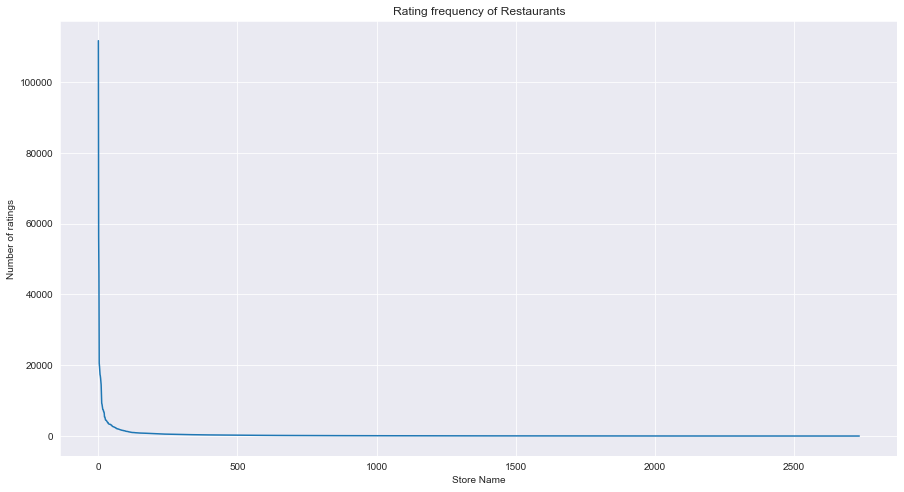

In [79]:
yes = rating_yes[['Store Name','ID']].groupby(['Store Name']).agg(['count']).sort_values(('ID','count'),ascending=False)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.lineplot(data=yes[('ID', 'count')].values)
plt.title("Rating frequency of Restaurants")
plt.xlabel("Store Name")
plt.ylabel("Number of ratings")

In [78]:
min_ratings = 500
print("Number of restaurants that have more than {} ratings: {}".format(min_ratings, len(yes[yes[('ID', 'count')]>=min_ratings])))

Number of restaurants that have more than 500 ratings: 263


In [29]:
min_stores_rated = 200

df_users = df1[['Store Name','ID']].groupby(['ID']).agg(['count']).sort_values(('Store Name','count'),ascending=False)

In [30]:
df_top_rating_users = df_users[df_users[('Store Name', 'count')]>=min_stores_rated]

In [31]:
top_rating_users = list(df_top_rating_users.index)

In [32]:
df_matrix = df_ratings_with_top_stores[df_ratings_with_top_stores['ID'].isin(top_rating_users)]

NameError: name 'df_ratings_with_top_stores' is not defined

In [38]:
# Transforming Positive Evaluation into number
df1['Positive Store Service (Yes / No)'] = df1['Positive Store Service (Yes / No)'].apply(lambda x: 1 if x=='Yes' else 0)

In [39]:
df1['Positive Store Service (Yes / No)'].value_counts()

0    1484266
1     975734
Name: Positive Store Service (Yes / No), dtype: int64

In [25]:
person_u = list(sort(frame.df1['ID'].unique()))

NameError: name 'sort_values' is not defined

In [ ]:
thing_u = list(sort(frame.df1['Store Name'].unique()))

In [ ]:
data = frame['count'].tolist()
row = frame.person.astype('category', categories=person_u).cat.codes
col = frame.thing.astype('category', categories=thing_u).cat.codes
sparse_matrix = csr_matrix((data, (row, col)), shape=(len(person_u), len(thing_u)))

In [54]:
# Pivot Table
pivot = df.pivot_table(index="ID", columns="Store Name", values="Positive Store Service (Yes / No)", aggfunc=np.sum)
pivot

MemoryError: Unable to allocate 8.26 GiB for an array with shape (2830, 391554) and data type object